#Feature Selection and Reduction Data Set 1

#Initializations

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df1=pd.read_csv("/content/SeoulBikeData.csv",encoding="latin1")

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


#Pearson Correlation

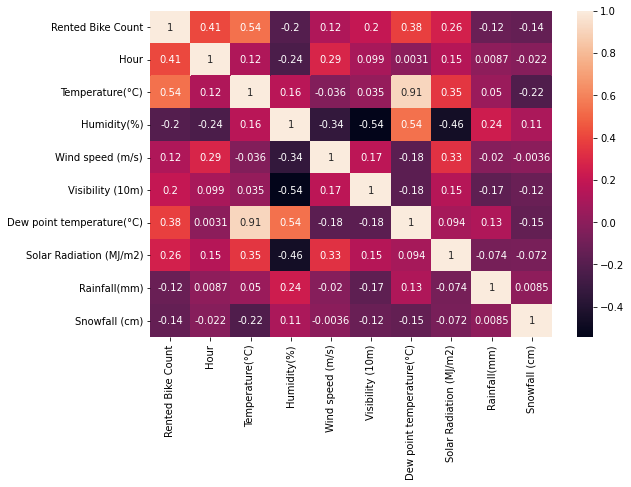

In [ ]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(),annot=True)

#Covariance Thresholding

In [ ]:
df_max_scaled = df.copy()

# apply normalization techniques
for column in df_max_scaled.columns:
  if pd.api.types.is_numeric_dtype(df_max_scaled[column]):
      df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()

df_max_scaled.cov()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,0.032900,0.022397,0.029615,-0.007529,0.003076,0.010994,0.029402,0.011721,-0.000720,-0.001277
Hour,0.022397,0.090590,0.011325,-0.015112,0.012021,0.009040,0.000392,0.010781,0.000085,-0.000321
Temperature(°C),0.029615,0.011325,0.091911,0.010039,-0.001539,0.003208,0.118112,0.026450,0.000491,-0.003286
Humidity(%),-0.007529,-0.015112,0.010039,0.043172,-0.009797,-0.034321,0.047613,-0.023687,0.001583,0.001116
Wind speed (m/s),0.003076,0.012021,-0.001539,-0.009797,0.019611,0.007305,-0.010549,0.011484,-0.000089,-0.000025
Visibility (10m),0.010994,0.009040,0.003208,-0.034321,0.007305,0.092507,-0.022929,0.011240,-0.001643,-0.001837
Dew point temperature(°C),0.029402,0.000392,0.118112,0.047613,-0.010549,-0.022929,0.182166,0.009942,0.001728,-0.003196
Solar Radiation (MJ/m2),0.011721,0.010781,0.026450,-0.023687,0.011484,0.011240,0.009942,0.060912,-0.000591,-0.000886
Rainfall(mm),-0.000720,0.000085,0.000491,0.001583,-0.000089,-0.001643,0.001728,-0.000591,0.001039,0.000014
Snowfall (cm),-0.001277,-0.000321,-0.003286,0.001116,-0.000025,-0.001837,-0.003196,-0.000886,0.000014,0.002463


#SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

df_new = SelectKBest(f_classif, k=6).fit_transform(df.select_dtypes(include='number'), df.iloc[:,0])
df_new.shape


(8760, 6)

In [ ]:
df_new[:5]

array([[ 254. ,   -5.2,   37. , 2000. ,  -17.6,    0. ],
       [ 204. ,   -5.5,   38. , 2000. ,  -17.6,    0. ],
       [ 173. ,   -6. ,   39. , 2000. ,  -17.7,    0. ],
       [ 107. ,   -6.2,   40. , 2000. ,  -17.6,    0. ],
       [  78. ,   -6. ,   36. , 2000. ,  -18.6,    0. ]])

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


#Forward Selection

In [ ]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
df_adapted = df.drop(['Rented Bike Count'], axis=1)
target_column=df["Rented Bike Count"]

In [ ]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
lreg = LinearRegression()
sfs1 = SFS(lreg, k_features=4, forward=True, verbose=2, scoring='neg_mean_squared_error')


In [ ]:
sfs1 = sfs1.fit(df_adapted.select_dtypes(include='number'), target_column)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2022-12-03 09:19:57] Features: 1/4 -- score: -320906.5579745431[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2022-12-03 09:19:57] Features: 2/4 -- score: -278728.8828908328[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2022-12-03 09:19:57] Features: 3/4 -- score: -266483.46877743833[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [ ]:
feat_names = list(sfs1.k_feature_names_)
feat_names

['Hour', 'Temperature(°C)', 'Humidity(%)', 'Rainfall(mm)']

#Backward Elimination

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [ ]:
lreg = LinearRegression()

sfs2 = sfs(lreg, k_features=4, forward=False, verbose=1, scoring='neg_mean_squared_error')


In [ ]:
df_adapted.loc[:,"Seasons"]

0       Winter
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
8755    Autumn
8756    Autumn
8757    Autumn
8758    Autumn
8759    Autumn
Name: Seasons, Length: 8760, dtype: object

In [ ]:
df_adapted = df.drop(['Rented Bike Count'], axis=1)
target_column=df.loc[:,"Rented Bike Count"]
dfx=pd.DataFrame()
for i in df_adapted:
  if pd.api.types.is_numeric_dtype(df_adapted[i]):
    dfx[i]=df_adapted.loc[:,i]

dfx

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [ ]:
sfs2 = sfs2.fit(dfx.values, target_column.values)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s finished
Features: 8/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s finished
Features: 7/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s finished
Features: 6/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished
Features: 5/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
Features: 4/4

In [ ]:
feat_names = list(sfs2.k_feature_names_)
feat_names

['0', '1', '5', '7']

#PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
fit = pca.fit(df.select_dtypes(include='number'))
print(("Explained Variance: %s") % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [6.03234087e-01 3.96045657e-01 5.07230148e-04 1.60331173e-04
 4.82461508e-05]
[[ 8.00511350e-01  3.61582914e-03  7.31939916e-03 -1.29261861e-02
   2.73178717e-04  5.99111355e-01  3.62417736e-03  3.47623740e-04
  -2.96378121e-04 -1.08231682e-04]
 [ 5.99142284e-01  2.45308288e-03  7.33767954e-03  1.22560084e-02
  -1.22420536e-04 -8.00451725e-01  9.77002757e-03  7.86348836e-05
   1.23598572e-04  6.22789176e-06]
 [-5.28973562e-03 -7.31125438e-02  3.34530196e-01  7.83240410e-01
  -1.42543806e-02  1.72034679e-02  5.18214980e-01 -1.02962401e-02
   9.87851094e-03 -1.03634756e-03]
 [-1.26805400e-02  1.22500575e-02  6.62837601e-01 -5.87057376e-01
   8.42500000e-03 -6.72107385e-03  4.62281075e-01  4.26214058e-02
   1.83194162e-04 -7.90750772e-03]
 [-4.60455169e-03  9.96382562e-01  2.21285203e-02  6.65610234e-02
   3.36945040e-02  1.14480055e-03  2.60583355e-02 -3.80729318e-03
   2.10609617e-02  2.61154824e-03]]


#Feature Selection and Reduction Data Set 1

#Initializations

In [ ]:
df1=pd.read_csv("/content/Egypt_Houses_Price.csv",encoding="latin1")

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ï»¿Type         27361 non-null  object
 1   Price           27359 non-null  object
 2   Bedrooms        27158 non-null  object
 3   Bathrooms       27190 non-null  object
 4   Area            26890 non-null  object
 5   Furnished       27361 non-null  object
 6   Level           27361 non-null  object
 7   Compound        27361 non-null  object
 8   Payment_Option  27361 non-null  object
 9   Delivery_Date   27361 non-null  object
 10  Delivery_Term   27361 non-null  object
 11  City            27361 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


In [ ]:
df1=df1.drop_duplicates()

In [ ]:
df1.isnull().sum()

ï»¿Type             0
Price               2
Bedrooms          200
Bathrooms         168
Area              465
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25770 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ï»¿Type         25770 non-null  object
 1   Price           25768 non-null  object
 2   Bedrooms        25570 non-null  object
 3   Bathrooms       25602 non-null  object
 4   Area            25305 non-null  object
 5   Furnished       25770 non-null  object
 6   Level           25770 non-null  object
 7   Compound        25770 non-null  object
 8   Payment_Option  25770 non-null  object
 9   Delivery_Date   25770 non-null  object
 10  Delivery_Term   25770 non-null  object
 11  City            25770 non-null  object
dtypes: object(12)
memory usage: 2.6+ MB


In [ ]:
df1.describe()

,ï»¿Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
count,25770,25768,25570,25602,25305,25770,25770,25770,25770,25770,25770,25770
unique,11,4182,22,22,1073,3,14,560,4,10,5,183
top,Apartment,3000000,3,2,120.0,No,Unknown,Unknown,Cash or Installment,Ready to move,Finished,New Cairo - El Tagamoa
freq,8091,293,9141,7190,615,15598,9895,10521,10033,11522,13452,6471


In [ ]:
df1=df1.replace('Unknown', np.nan)
df1=df1.replace('Unknown ', np.nan)
df1=df1.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25770 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ï»¿Type         25766 non-null  object
 1   Price           25763 non-null  object
 2   Bedrooms        25566 non-null  object
 3   Bathrooms       25598 non-null  object
 4   Area            25301 non-null  object
 5   Furnished       17847 non-null  object
 6   Level           15875 non-null  object
 7   Compound        15249 non-null  object
 8   Payment_Option  25770 non-null  object
 9   Delivery_Date   16413 non-null  object
 10  Delivery_Term   21254 non-null  object
 11  City            25770 non-null  object
dtypes: object(12)
memory usage: 2.6+ MB


In [ ]:
df1.isnull().sum()

ï»¿Type               4
Price                 7
Bedrooms            204
Bathrooms           172
Area                469
Furnished          7923
Level              9895
Compound          10521
Payment_Option        0
Delivery_Date      9357
Delivery_Term      4516
City                  0
dtype: int64

In [ ]:
df1['Price'] = df1['Price'].astype("float")
df1['Price'] = df1['Price'].replace(np.nan, df1["Price"].mean())

In [ ]:
df1["ï»¿Type"].unique()

array(['Duplex', 'Apartment', 'Penthouse', 'Studio', nan, 'Chalet',
       'Standalone Villa', 'Twin house', 'Town House',
       'Stand Alone Villa', 'Twin House'], dtype=object)

In [ ]:
df1["ï»¿Type"]=df1["ï»¿Type"].astype("category")

In [ ]:

df1['ï»¿Type'].value_counts().idxmax()

'Apartment'

In [ ]:
df1["ï»¿Type"] = df1["ï»¿Type"].replace(np.nan, df1["ï»¿Type"].value_counts().idxmax())

In [ ]:
df1.loc[:,"ï»¿Type"]=df1.loc[:,"ï»¿Type"].fillna(df1["ï»¿Type"].value_counts().idxmax())

In [ ]:
df1["ï»¿Type"].unique()

['Duplex', 'Apartment', 'Penthouse', 'Studio', 'Chalet', 'Stand Alone Villa', 'Twin house', 'Town House']
Categories (8, object): ['Apartment', 'Chalet', 'Duplex', 'Penthouse', 'Stand Alone Villa', 'Studio',
                         'Town House', 'Twin house']

In [ ]:
df1["ï»¿Type"] = df1["ï»¿Type"].replace("Twin House", "Twin house")

In [ ]:
df1["ï»¿Type"] = df1["ï»¿Type"].replace("Standalone Villa", "Stand Alone Villa")

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25770 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ï»¿Type         25770 non-null  category
 1   Price           25770 non-null  float64 
 2   Bedrooms        25566 non-null  object  
 3   Bathrooms       25598 non-null  object  
 4   Area            25301 non-null  object  
 5   Furnished       17847 non-null  object  
 6   Level           15875 non-null  object  
 7   Compound        15249 non-null  object  
 8   Payment_Option  25770 non-null  object  
 9   Delivery_Date   16413 non-null  object  
 10  Delivery_Term   21254 non-null  object  
 11  City            25770 non-null  object  
dtypes: category(1), float64(1), object(10)
memory usage: 2.4+ MB


In [ ]:
df1["Furnished"].unique()

array(['No', nan, 'Yes'], dtype=object)

In [ ]:
df1["Bedrooms"].unique()

array(['3.0', '2.0', '4.0', '5.0', '1.0', nan, '7.0', '6.0', '10+', '3',
       '2', '5', '4', '1', '6', '7', '8', '10', '9', '9.0', '8.0', '10.0'],
      dtype=object)

In [ ]:
for i in range(1,11):
  df1["Bedrooms"]=df1["Bedrooms"].replace(str(i)+".0",str(i))

In [ ]:
df1["Bedrooms"] = df1["Bedrooms"].replace(np.nan, df1["Bedrooms"].value_counts().idxmax())

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25770 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ï»¿Type         25770 non-null  category
 1   Price           25770 non-null  float64 
 2   Bedrooms        25770 non-null  object  
 3   Bathrooms       25598 non-null  object  
 4   Area            25301 non-null  object  
 5   Furnished       17847 non-null  object  
 6   Level           15875 non-null  object  
 7   Compound        15249 non-null  object  
 8   Payment_Option  25770 non-null  object  
 9   Delivery_Date   16413 non-null  object  
 10  Delivery_Term   21254 non-null  object  
 11  City            25770 non-null  object  
dtypes: category(1), float64(1), object(10)
memory usage: 2.4+ MB


In [ ]:
df1["Bathrooms"].unique()

array(['3.0', '2.0', '5.0', '1.0', '4.0', nan, '7.0', '10+', '3', '2',
       '1', '4', '6', '5', '7', '8', '6.0', '10.0', '9', '10', '8.0',
       '9.0'], dtype=object)

In [ ]:
for i in range(1,11):
  df1["Bathrooms"]=df1["Bathrooms"].replace(str(i)+".0",str(i))

In [ ]:
df1["Bathrooms"] = df1["Bathrooms"].replace(np.nan, df1["Bathrooms"].value_counts().idxmax())

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25770 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ï»¿Type         25770 non-null  category
 1   Price           25770 non-null  float64 
 2   Bedrooms        25770 non-null  object  
 3   Bathrooms       25770 non-null  object  
 4   Area            25301 non-null  object  
 5   Furnished       17847 non-null  object  
 6   Level           15875 non-null  object  
 7   Compound        15249 non-null  object  
 8   Payment_Option  25770 non-null  object  
 9   Delivery_Date   16413 non-null  object  
 10  Delivery_Term   21254 non-null  object  
 11  City            25770 non-null  object  
dtypes: category(1), float64(1), object(10)
memory usage: 2.4+ MB


In [ ]:
len(df1["Area"].unique())

1073

In [ ]:
df1["Area"]=df1["Area"].astype("float")

In [ ]:
df1['Area'] = df1['Area'].replace(np.nan, df1["Area"].mean())

In [ ]:
df1['Level'].unique()

array(['7', '10+', '1', '10', 'Ground', 'Highest', '3', '2', '4', '9',
       '5', '8', '6', nan], dtype=object)

In [ ]:
df1['Level']=df1['Level'].replace("Ground","0")

In [ ]:
df1["Payment_Option"].unique()

array(['Cash', 'Cash or Installment', 'Unknown Payment', 'Installment'],
      dtype=object)

In [ ]:
for i in df1:
  if i!= "Price" and i!="Area":
    df1[i]=df1[i].astype("category")
  else:
    df1[i]=df1[i].astype("float")

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25770 entries, 0 to 27360
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ï»¿Type         25770 non-null  category
 1   Price           25770 non-null  float64 
 2   Bedrooms        25770 non-null  category
 3   Bathrooms       25770 non-null  category
 4   Area            25770 non-null  float64 
 5   Payment_Option  25770 non-null  category
 6   City            25770 non-null  category
dtypes: category(5), float64(2)
memory usage: 761.8 KB


#Missing Value Ratio

In [ ]:
df1=df1.drop(["Delivery_Term","Delivery_Date","Compound","Level","Furnished"],axis=1)

#Pearson Correlation

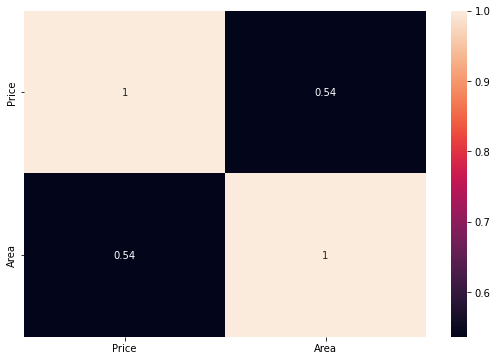

In [ ]:
plt.figure(figsize=(9,6))
sns.heatmap(df1.corr(),annot=True)

#Covariance Thresholding

In [ ]:
df1_max_scaled = df1.copy()

# apply normalization techniques
for column in df1_max_scaled.columns:
  if pd.api.types.is_numeric_dtype(df1_max_scaled[column]):
      df1_max_scaled[column] = df1_max_scaled[column]  / df1_max_scaled[column].abs().max()

df1_max_scaled.cov()

,Price,Area
Price,0.000823,0.002478
Area,0.002478,0.025891


#SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

df1_new = SelectKBest(f_classif, k=1).fit_transform(df1.select_dtypes(include='number'), df1.iloc[:,0])
df1_new.shape


(25770, 1)

In [ ]:
df1_new[:5]

array([[400.],
       [160.],
       [165.],
       [230.],
       [160.]])

In [ ]:
df1.head()

,ï»¿Type,Price,Bedrooms,Bathrooms,Area,Payment_Option,City
0,Duplex,4000000.0,3,3,400.0,Cash,Nasr City
1,Apartment,4000000.0,3,3,160.0,Cash,Camp Caesar
2,Apartment,2250000.0,3,2,165.0,Cash,Smoha
3,Apartment,1900000.0,3,2,230.0,Cash,Nasr City
4,Apartment,5800000.0,2,3,160.0,Cash,New Cairo - El Tagamoa


#PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
fit = pca.fit(df1.select_dtypes(include='number'))
print(("Explained Variance: %s") % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [1.]
[[1.00000000e+00 1.25179165e-05]]
